#Importing essential libraries for data analysis and visualization



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data for analysis/LoanApproval/LoanApproval_train.csv")

In [3]:
data1=data.copy()

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,513.0,5497.013645,6486.147388,150.0,2876.0,3846.0,5746.0,81000.0
CoapplicantIncome,513.0,1537.364366,2144.079038,0.0,0.0,1210.0,2283.0,20000.0
LoanAmount,495.0,144.739394,83.200278,17.0,100.0,127.0,163.0,700.0
Loan_Amount_Term,499.0,343.118236,63.375911,12.0,360.0,360.0,360.0,480.0
Credit_History,470.0,0.846809,0.360556,0.0,1.0,1.0,1.0,1.0


In [7]:
data.isnull().sum()

,0
Loan_ID,0
Gender,10
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18
Loan_Amount_Term,14


#Handling Missing Value

In [8]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [10]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [11]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [12]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [13]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [14]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

#Visualization

In [15]:
numeric_Data=data.select_dtypes(["int64","float64"])

In [16]:
corr_matrix=numeric_Data.corr()

#Generates a heatmap visualization of the correlation matrix with annotations

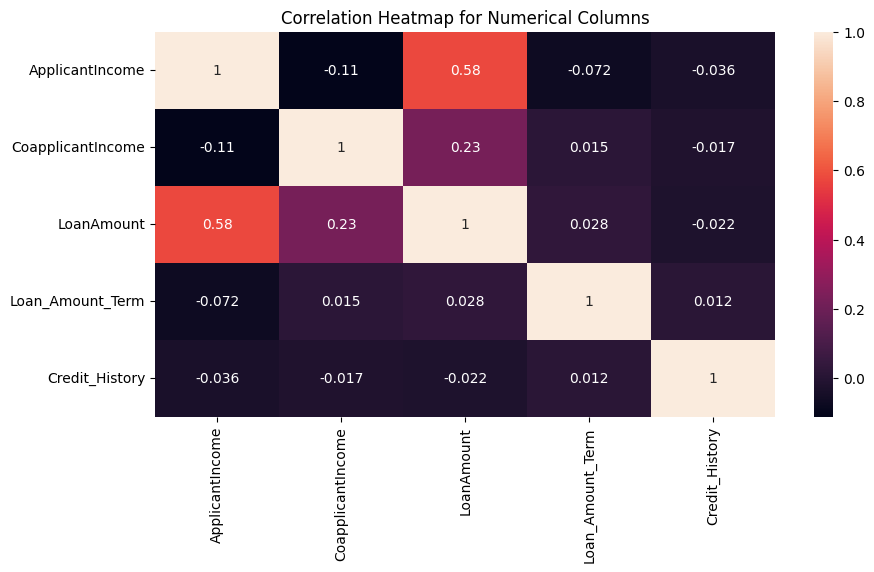

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

There is a positive correlation between LoanAmount and ApplicantIncome.


---



#the cardinality of each column in the DataFrame is calculated to provide insights into the data distribution.

In [18]:
for i in data:
  x=data[i].value_counts()
  print(f"{i} has Unique values Count : {len(x)}")

Loan_ID has Unique values Count : 513
Gender has Unique values Count : 2
Married has Unique values Count : 2
Dependents has Unique values Count : 4
Education has Unique values Count : 2
Self_Employed has Unique values Count : 2
ApplicantIncome has Unique values Count : 426
CoapplicantIncome has Unique values Count : 244
LoanAmount has Unique values Count : 184
Loan_Amount_Term has Unique values Count : 10
Credit_History has Unique values Count : 2
Property_Area has Unique values Count : 3
Loan_Status has Unique values Count : 2


In [19]:
for i in data:
  x=data[i].unique()
  print(f"{i} has Unique values  : {x}")

Loan_ID has Unique values  : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280'

#create a new DataFrame cat_data containing only the categorical columns

In [20]:
Cat_data=data[["Gender","Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]]

#create a visualization of the distribution of categorical data.

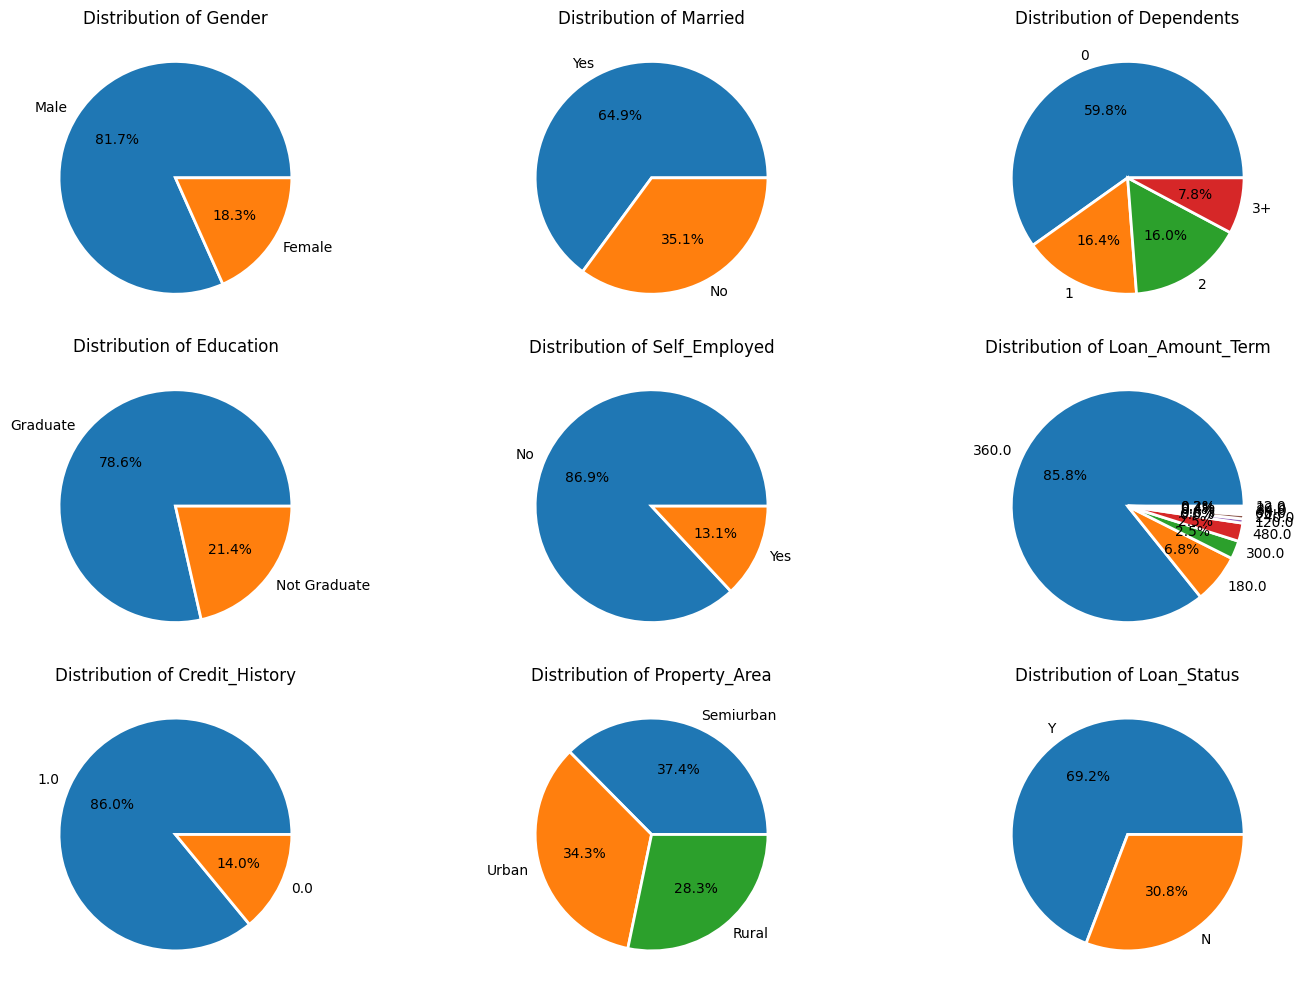

In [21]:
n_cols = len(Cat_data.columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(Cat_data.columns):
    x = Cat_data[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', wedgeprops={"linewidth": 2, "edgecolor": "white"})
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


From the graphs, it can be seen that the majority of loan applicants are male, and most of them are married.
Most of the applicants do not have dependents,  and the majority have a positive credit history.
Long-term loans dominate the data.


---



#Visualiz using a bar plot.

<Axes: xlabel='Gender'>

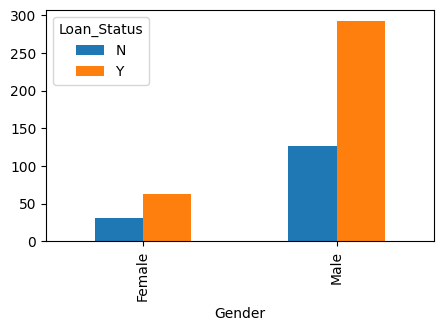

In [22]:
Gender=pd.crosstab(data["Gender"],data["Loan_Status"],)
Gender.plot(kind="bar", figsize=(5,3))

<Axes: xlabel='Gender'>

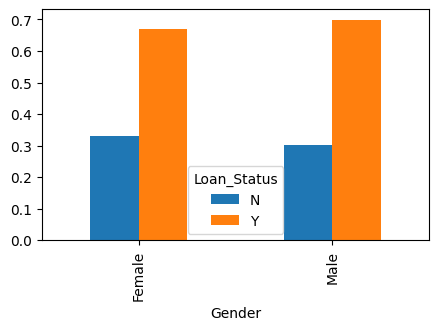

In [23]:
Gender=pd.crosstab(data["Gender"],data["Loan_Status"],normalize="index")
Gender.plot(kind="bar", figsize=(5,3))

It was observed that the acceptance rate for men is significantly higher than that for women. However, after normalization, it became clear that the acceptance rate for men relative to their number is nearly equal to the acceptance rate for women relative to their number.

---





<Axes: xlabel='Married'>

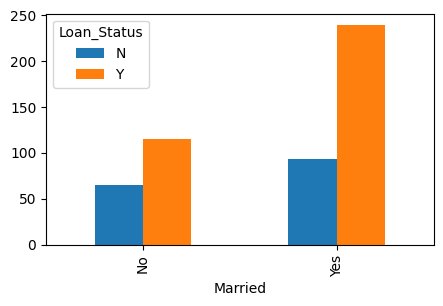

In [24]:
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.plot(kind="bar", figsize=(5,3))

<Axes: xlabel='Married'>

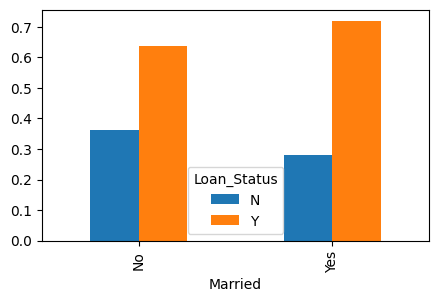

In [25]:
Married=pd.crosstab(data["Married"],data["Loan_Status"],normalize="index")
Married.plot(kind="bar",figsize=(5,3))

Similarly, initial perceptions indicated that the approval rates for married individuals were significantly higher than those for unmarried individuals. However, after normalization, it became clear that the number of married applicants greatly exceeds that of unmarried applicants.
Therefore, the acceptance rate appears higher for married individuals.


---



<Axes: xlabel='Property_Area'>

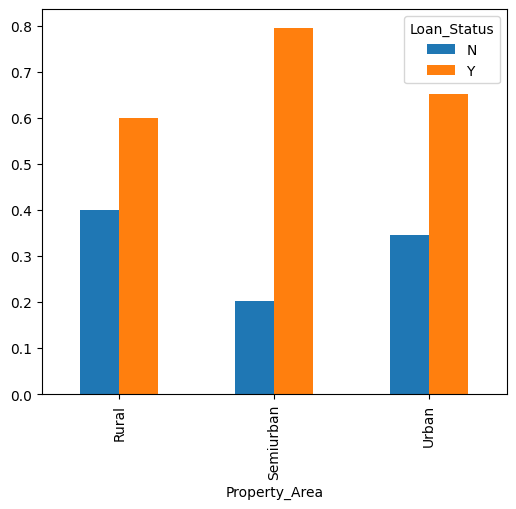

In [26]:
Property_Area=pd.crosstab(data["Property_Area"],data["Loan_Status"], normalize="index")
Property_Area.plot(kind="bar",figsize=(6,5))

Loan approval rates tend to be higher in semi-urban areas compared to rural and urban areas.


---



In [27]:
Dependents=pd.crosstab(data["Dependents"],data["Loan_Status"])
Education=pd.crosstab(data["Education"],data["Loan_Status"])
Self_Employed=pd.crosstab(data["Self_Employed"],data["Loan_Status"])
Loan_Amount_Term=pd.crosstab(data["Loan_Amount_Term"],data["Loan_Status"])
Credit_History=pd.crosstab(data["Credit_History"],data["Loan_Status"])

<Axes: xlabel='Credit_History'>

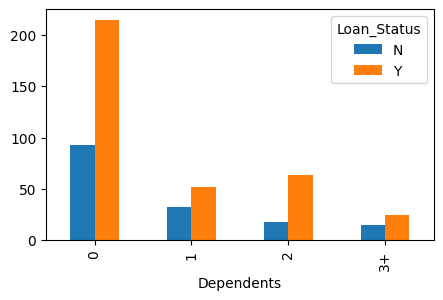

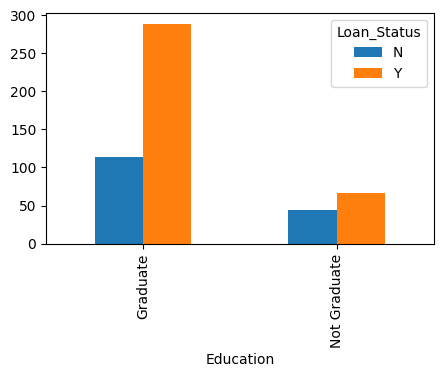

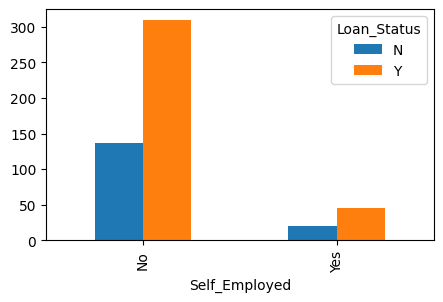

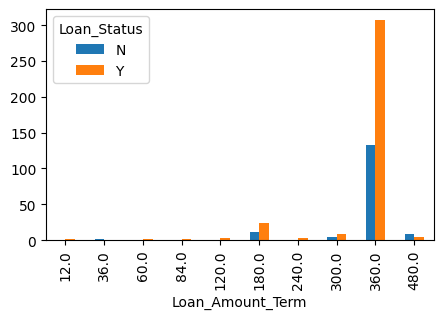

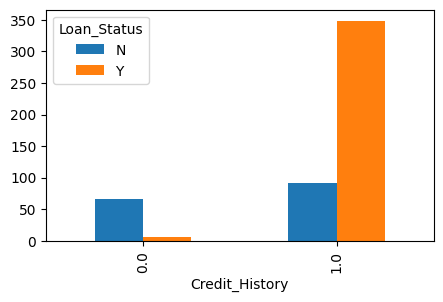

In [28]:
Dependents.plot(kind="bar",figsize=(5,3))
Education.plot(kind="bar",figsize=(5,3))
Self_Employed.plot(kind="bar",figsize=(5,3))
Loan_Amount_Term.plot(kind="bar",figsize=(5,3))
Credit_History.plot(kind="bar",figsize=(5,3))

#create a grid of box plots to visualize the distribution of numerical data in a DataFrame named numeric_Data.
Each box plot represents a different numerical column to identify outliers.

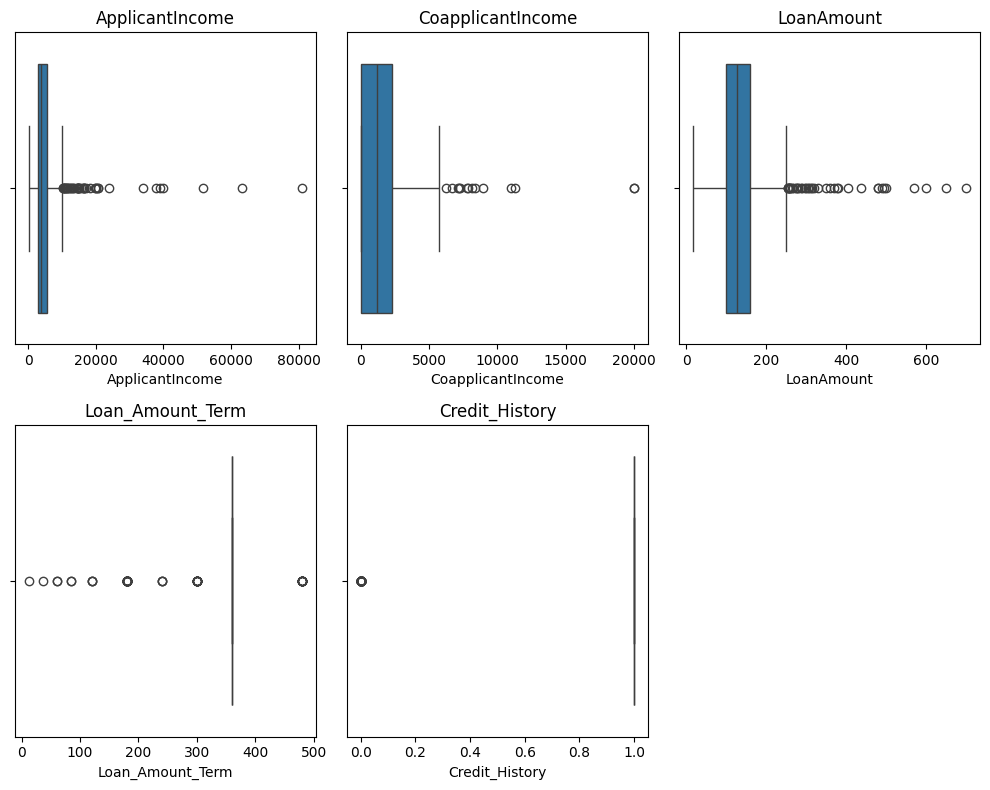

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.flatten()


for i, col in enumerate(numeric_Data.columns):
    sns.boxplot(x=numeric_Data[col], ax=axes[i])
    axes[i].set_title(col)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We conclude from this graph that ApplicantIncome, CoapplicantIncome, and LoanAmount contain `outliers`.

#Modified Z-Score function to identify outliers

In [30]:
def ZscoreHndling(df):
  median_df=df.median()
  df_mad=np.abs(df-median_df)
  MAD=df_mad.median()
  MZ=(0.6745*(df-median_df))/MAD
  outlier=MZ[(MZ<-3) | (MZ>3)]
  print(f"outlier:\n{outlier}")

  return outlier

In [31]:
ZscoreHndling(numeric_Data["CoapplicantIncome"])

outlier:
9       5.439480
12      3.844093
38      3.344628
122     4.331293
135     3.645645
177     5.624550
180     3.366926
253     3.283867
372     3.714210
402    10.474260
417    10.474260
444     3.970631
506     3.041939
Name: CoapplicantIncome, dtype: float64


,CoapplicantIncome
9,5.439480
12,3.844093
38,3.344628
122,4.331293
135,3.645645
177,5.624550
180,3.366926
253,3.283867
372,3.714210
402,10.474260


#Outlier Handling

In [32]:
numeric_Data=numeric_Data[numeric_Data["ApplicantIncome"]<40000]

In the same way, based on the box plot, values ​​greater than 40,000 were excluded.


---



In [33]:
numeric_Data=numeric_Data[numeric_Data["CoapplicantIncome"]<10000]

We cannot consider all out-of-range values ​​in a boxplot to be outliers, so only very distant values ​​that were greater than 10,000 were removed.


---



In [34]:
numeric_Data=numeric_Data[numeric_Data["LoanAmount"]<600]

In the same way, based on the box plot, values ​​greater than 600 were excluded.


---



<Axes: >

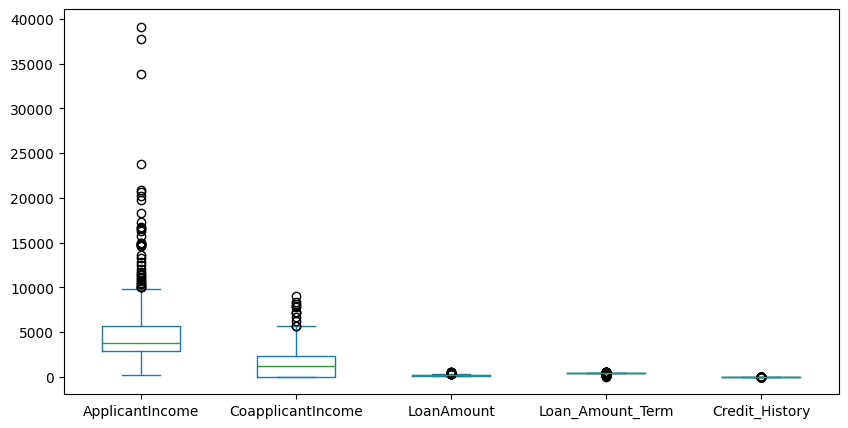

In [35]:
numeric_Data.plot(kind="box", figsize=(10,5))

Through Box Plot, we ensured that the values ​​in each column were within the range we wanted.


---



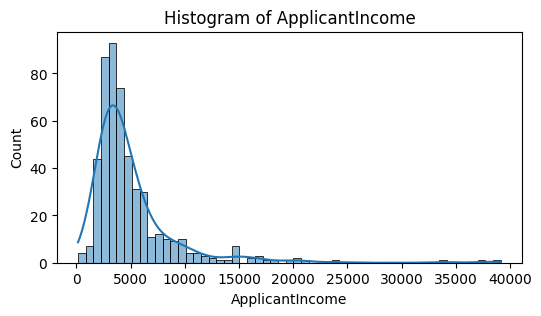

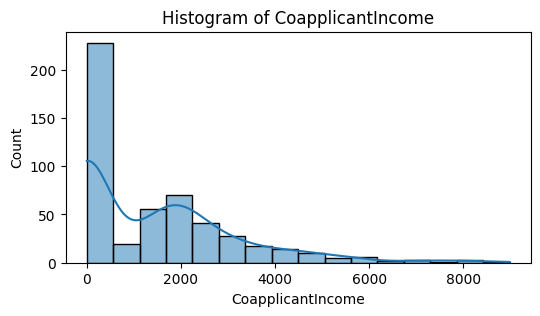

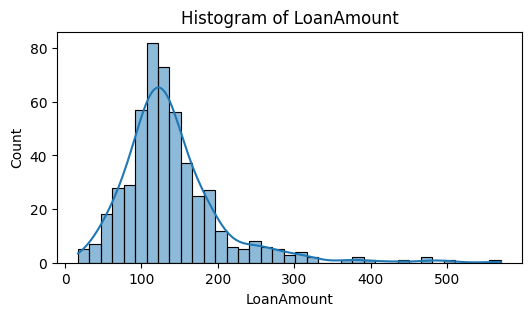

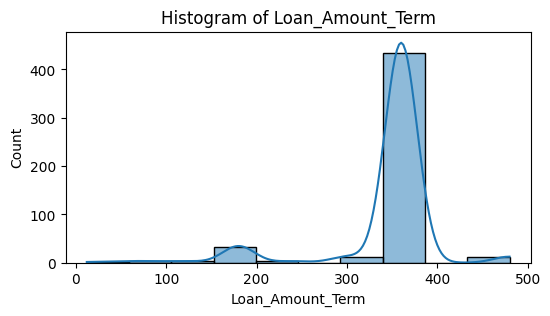

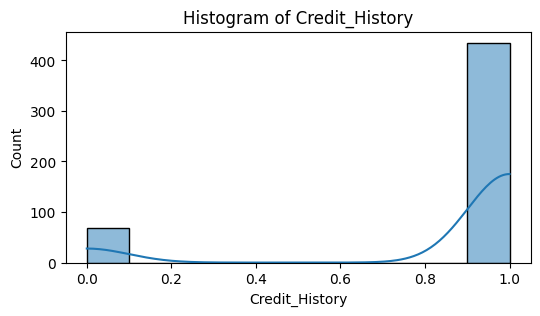

In [36]:
for i in numeric_Data:
  plt.figure(figsize=(6,3))
  sns.histplot(data=numeric_Data, x=numeric_Data[i], kde=True)
  plt.title(f"Histogram of {i}")
  plt.show()
  print(" ")

In [37]:
Get_loan=data[data["Loan_Status"]=="Y"]
Not_get_loan=data[data["Loan_Status"]=="N"]

#Create a series of scatter plots to analyze the relationship between numerical variables and loan approval status.

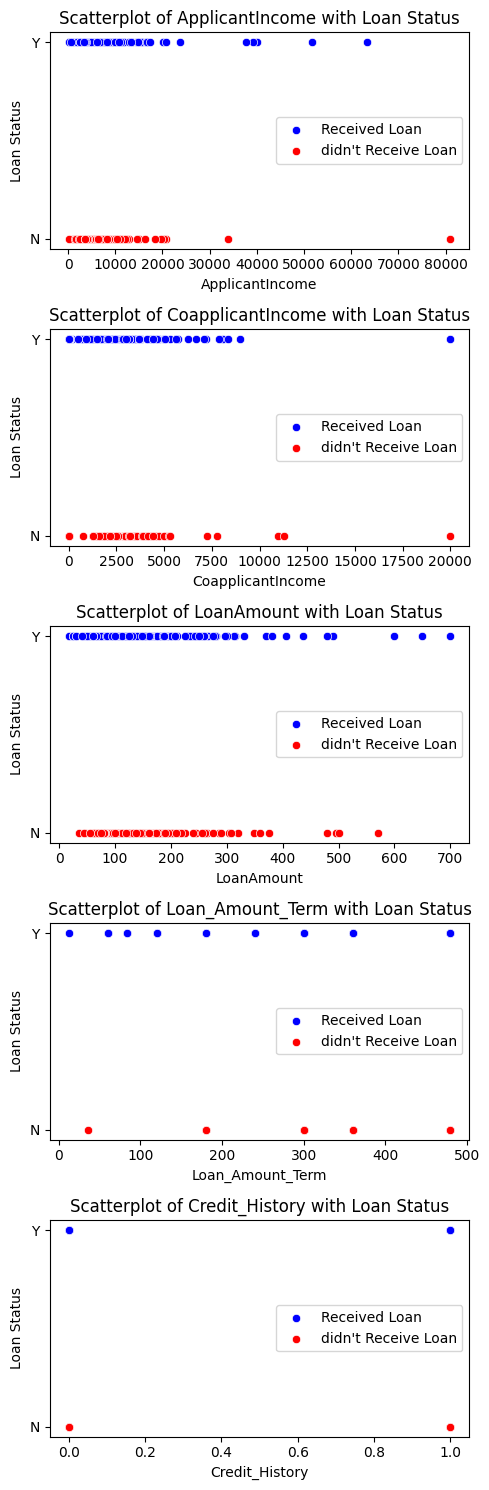

In [38]:
fig, axes = plt.subplots(nrows=len(numeric_Data.columns), ncols=1, figsize=(5, 3 * len(numeric_Data.columns)))

for idx, col in enumerate(numeric_Data.columns):
    # الرسم للأشخاص الذين حصلوا على القرض
    sns.scatterplot(x=Get_loan[col], y=Get_loan["Loan_Status"], color="blue", label="Received Loan", ax=axes[idx])

    # الرسم للأشخاص الذين لم يحصلوا على القرض
    sns.scatterplot(x=Not_get_loan[col], y=Not_get_loan["Loan_Status"], color="red", label="didn't Receive Loan", ax=axes[idx])

    axes[idx].set_title(f"Scatterplot of {col} with Loan Status")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Loan Status")

plt.tight_layout()
plt.show()


# Creates bar charts to visualize the distribution of numerical variables across loan approval status.

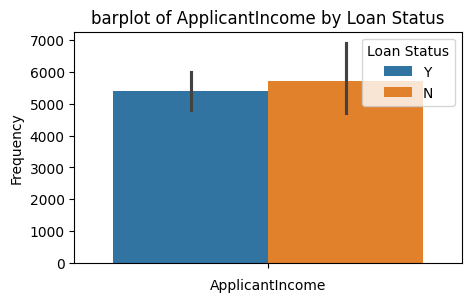

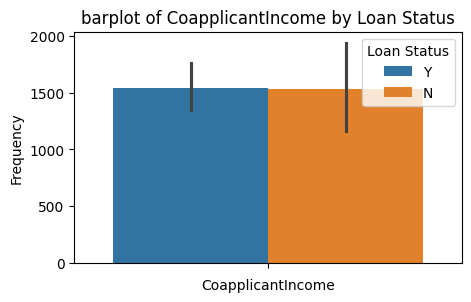

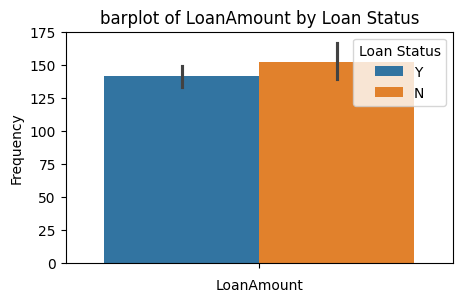

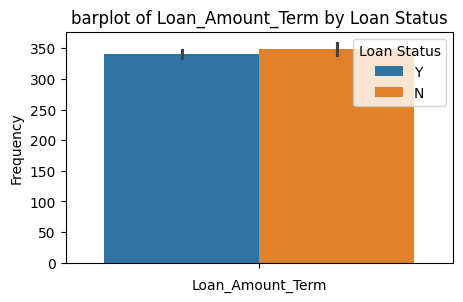

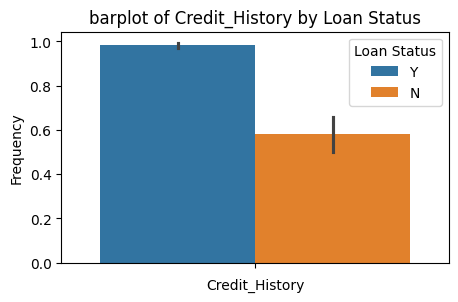

In [39]:
for column in numeric_Data.columns:
    if column != "Loan_Status":
        plt.figure(figsize=(5, 3))
        sns.barplot(data=data, y=column, hue="Loan_Status")
        plt.title(f'barplot of {column} by Loan Status')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend(title='Loan Status')
        plt.show()
        print(" ")

Based on the bar charts showing the relationship between various numerical variables and loan status (Loan_Status), we can draw the following conclusions:

###1.ApplicantIncome and CoapplicantIncome:
The income levels of applicants (both "Applicant Income" and "Coapplicant Income") appear to be similar between those who received the loan and those who did not. This suggests that the applicant’s income alone may not be a decisive factor in the loan approval decision.

###2.LoanAmount:
The amount of loan requested also seems comparable between the two groups (those who received the loan and those who did not). This could imply that the requested loan amount does not significantly influence loan approval.

###3.Loan_Amount_Term:
The loan term duration also appears to be similar between the two groups, indicating that the length of the loan term may not play a significant role in the loan decision.

###4.Credit_History:
It is evident that individuals who received the loan have a higher credit history score compared to those who did not. This suggests that having a positive credit history is a key factor in loan approval.

###Summary:
The Credit_History factor clearly has a significant impact on the loan approval decision, while other factors like income, loan amount, and loan term seem to have a less prominent role in the decision-making process.


---



#Encoding

In [40]:
for i in Cat_data:
  x=Cat_data[i].unique()
  print(f"{i} has Unique values  : {x}")

Gender has Unique values  : ['Male' 'Female']
Married has Unique values  : ['No' 'Yes']
Dependents has Unique values  : ['0' '1' '2' '3+']
Education has Unique values  : ['Graduate' 'Not Graduate']
Self_Employed has Unique values  : ['No' 'Yes']
Loan_Amount_Term has Unique values  : [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
Credit_History has Unique values  : [1. 0.]
Property_Area has Unique values  : ['Urban' 'Rural' 'Semiurban']
Loan_Status has Unique values  : ['Y' 'N']


In [41]:
Gender={"Female":0,"Male":1 }
Cat_data["Gender"]=Cat_data["Gender"].apply(lambda x :Gender[x] )

<ipython-input-41-ddb20961fddb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Gender"]=Cat_data["Gender"].apply(lambda x :Gender[x] )


In [42]:
Married ={"No":0,"Yes":1 }
Cat_data["Married"]=Cat_data["Married"].apply(lambda x: Married[x])

<ipython-input-42-9c1b8e46e15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Married"]=Cat_data["Married"].apply(lambda x: Married[x])


In [43]:
Dependents ={'0':0, '1':1 ,'2':2, '3+':3}
Cat_data["Dependents"]=Cat_data["Dependents"].apply(lambda x: Dependents[x])

<ipython-input-43-e79e4ed51e8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Dependents"]=Cat_data["Dependents"].apply(lambda x: Dependents[x])


In [44]:
Education ={"Not Graduate":0,"Graduate":1 }
Cat_data["Education"]=Cat_data["Education"].apply(lambda x: Education[x])

<ipython-input-44-37f6cf986f05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Education"]=Cat_data["Education"].apply(lambda x: Education[x])


In [45]:
Self_Employed ={"No":0,"Yes":1 }
Cat_data["Self_Employed"]=Cat_data["Self_Employed"].apply(lambda x: Self_Employed[x])

<ipython-input-45-f792b4755a69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Self_Employed"]=Cat_data["Self_Employed"].apply(lambda x: Self_Employed[x])


In [46]:
Loan_Amount_Term={360.:0, 120.:1, 240.:2, 180.:3,  60.:4, 300.:5, 480.:6,  36.:7,  84.:8,  12.:9 }
Cat_data["Loan_Amount_Term"]=Cat_data["Loan_Amount_Term"].apply(lambda x: Loan_Amount_Term[x])

<ipython-input-46-7df10eaea193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Loan_Amount_Term"]=Cat_data["Loan_Amount_Term"].apply(lambda x: Loan_Amount_Term[x])


In [47]:
Credit_History ={0.:0, 1.:1 }
Cat_data["Credit_History"]=Cat_data["Credit_History"].apply(lambda x: Credit_History[x])

<ipython-input-47-b3b607f3a27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Credit_History"]=Cat_data["Credit_History"].apply(lambda x: Credit_History[x])


In [48]:
Property_Area ={'Urban':0, 'Rural':1, 'Semiurban':2}
Cat_data["Property_Area"]=Cat_data["Property_Area"].apply(lambda x: Property_Area[x])

<ipython-input-48-ff493b33441f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Property_Area"]=Cat_data["Property_Area"].apply(lambda x: Property_Area[x])


In [49]:
Loan_Status ={"N":0, "Y":1}
Cat_data["Loan_Status"]=Cat_data["Loan_Status"].apply(lambda x: Loan_Status[x])

<ipython-input-49-353d95dc608b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_data["Loan_Status"]=Cat_data["Loan_Status"].apply(lambda x: Loan_Status[x])


In [50]:
Cat_data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0,1,0,1
1,1,1,1,1,0,0,1,1,0
2,1,1,0,1,1,0,1,0,1
3,1,1,0,0,0,0,1,0,1
4,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
508,1,1,0,1,1,0,1,0,1
509,0,0,1,1,0,0,1,0,1
510,1,0,0,0,0,0,1,1,0
511,1,1,1,1,0,0,1,2,1


#categorical data scaling

In [51]:
Cat_data_max=Cat_data.max()
Cat_data=Cat_data.divide(Cat_data_max)

In [52]:
Cat_data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.5,0.0
2,1.0,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
508,1.0,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0
509,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0
510,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.5,0.0
511,1.0,1.0,0.333333,1.0,0.0,0.0,1.0,1.0,1.0


#Scaling numeric data

In [53]:
numeric_Data_max=numeric_Data.max()
numeric_Data=numeric_Data.divide(numeric_Data_max)

In [54]:
numeric_Data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.149411,0.000000,0.253929,0.75,1.0
1,0.117072,0.167929,0.224561,0.75,1.0
2,0.076634,0.000000,0.115789,0.75,1.0
3,0.065982,0.262584,0.210526,0.75,1.0
4,0.153268,0.000000,0.247368,0.75,1.0
...,...,...,...,...,...
508,0.063325,0.335523,0.329825,0.75,1.0
509,0.338774,0.000000,0.070175,0.75,1.0
510,0.091910,0.143318,0.175439,0.75,1.0
511,0.154929,0.223163,0.438596,0.75,1.0
